# 1. Introduction

According to the World Health Organisation (WHO), stroke is the 2 nd leading cause of death globally, responsible for approximately 11% of total deaths.

The dataset provided is used to predict whether a patient is likely to get a stroke based on input parameters like gender, age, various diseases and smoking status.

# 2. Imports and initial load

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import dtale
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,roc_auc_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, KFold, cross_val_score

#### read data and do a first look at the data

In [85]:
stroke_df = pd.read_csv("../Downloads/stroke_data.csv", index_col="id")

In [3]:
# print the dataframe
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [4]:
# print shape
stroke_df.shape

(5110, 11)

In [5]:
# print top 5 rows
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# describe dataframe with statistics
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# get counts and datatypes
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


The dataset we're working with includes both numerical and categorical variables, making it important to ensure that each column is properly structured for analysis.

First, let’s focus on the target variable, which is "stroke". This column is crucial for our predictions, and it is represented as a binary integer, where:

1 indicates a positive stroke case (the patient had a stroke), and
0 indicates a negative case (the patient did not have a stroke).
Next, we have 7 numeric variables in total, which are divided into:

4 integer (int64) columns, including variables like hypertension and heart_disease, both of which are binary, coded as 1 for the presence of the condition and 0 for the absence.
3 floating-point (float64) columns, which capture continuous data, such as age, bmi, and average glucose level.
There are also 5 non-numeric (categorical) variables, all stored as object types. These include information such as gender, smoking status, and work type.

To prepare the data for modeling, it’s critical to convert these categorical variables into a format that machine learning algorithms can understand. We can use Label Encoding to transform these categories into numerical values.


Lastly, it’s important to double-check the dataset for correct design and data types to ensure that everything is aligned for further analysis and model building.

In [8]:
# show columns in dataframe
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### change datatypes

In [9]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [10]:
# Convert all object columns to category using lambda and apply
stroke_df[stroke_df.select_dtypes(include=['object']).columns] = stroke_df.select_dtypes(include=['object']).apply(lambda col: col.astype('category'))

In [11]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 305.2 KB


#### check for missing data for numerical data

In [12]:
# check for missing values in data
missing = stroke_df.isnull().agg(lambda x: [x.sum(), 100 * x.mean()]).T
missing.columns = ['count', '%']
missing = missing.sort_values(by='count')
print(missing)

                   count         %
gender               0.0  0.000000
age                  0.0  0.000000
hypertension         0.0  0.000000
heart_disease        0.0  0.000000
ever_married         0.0  0.000000
work_type            0.0  0.000000
Residence_type       0.0  0.000000
avg_glucose_level    0.0  0.000000
smoking_status       0.0  0.000000
stroke               0.0  0.000000
bmi                201.0  3.933464


bmi is the only column that has missing data - around 3.9% of the columns values are empty which is 201 rows
lets create a function that removes the missing data

In [13]:

# Convert the 'bmi' column to numeric, setting invalid parsing to NaN
stroke_df['bmi'] = pd.to_numeric(stroke_df['bmi'], errors='coerce')

# Make sure 'age' and 'gender' are not categorical for proper grouping
stroke_df['age'] = pd.to_numeric(stroke_df['age'], errors='coerce')  # Convert 'age' to numeric
stroke_df['gender'] = stroke_df['gender'].astype(str)  # Ensure 'gender' is string (not categorical)

# Group by 'age' and 'gender', and calculate the mean of the 'bmi' column
average_bmi = stroke_df.groupby(["age", "gender"])['bmi'].mean().to_dict()


In [14]:
average_bmi[(1, 'Female')]

24.5

In [15]:
def bmi_guesser(age_gender):
    age_gender = tuple(age_gender)
    bmi =average_bmi[age_gender]
    return bmi

In [16]:
bmi_guesser((1, 'Female'))

24.5

In [17]:
# Create a copy of the stroke DataFrame
copied_df = stroke_df.copy()

# Loop over (age, gender) combinations in the average_bmi dictionary
for age, gender in average_bmi.keys():
    # Filter the DataFrame for the specific age and gender combination
    temp_df = stroke_df.loc[(stroke_df.age == age) & (stroke_df.gender == gender), :]
    
    # Get the indices of rows where BMI is missing
    missing_values_index = temp_df.loc[temp_df.bmi.isna()].index
    
    # Try to get the guessed BMI from the bmi_guesser function
    try:
        guessed_bmi = bmi_guesser([age, gender])
        # Fill the missing BMI values with the guessed BMI
        stroke_df.loc[missing_values_index, "bmi"] = guessed_bmi
    except KeyError:
        print(f"No average BMI data available for age: {age} and gender: {gender}")

In [18]:
stroke_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  1
smoking_status       0
stroke               0
dtype: int64

In [19]:
#replace the last na with mean as no tuple was found
stroke_df['bmi']=stroke_df['bmi'].fillna(stroke_df['bmi'].mean())

In [20]:
# check for missing values in data
missing = stroke_df.isnull().agg(lambda x: [x.sum(), 100 * x.mean()]).T
missing.columns = ['count', '%']
missing = missing.sort_values(by='count')
print(missing)

                   count    %
gender               0.0  0.0
age                  0.0  0.0
hypertension         0.0  0.0
heart_disease        0.0  0.0
ever_married         0.0  0.0
work_type            0.0  0.0
Residence_type       0.0  0.0
avg_glucose_level    0.0  0.0
bmi                  0.0  0.0
smoking_status       0.0  0.0
stroke               0.0  0.0


all missing rows are gone

#### non numerical data
Non-numerical data is harder to understand than numerical data in data science because it lacks mathematical operations and natural ordering, making analysis challenging. Additionally, it requires extensive preprocessing to convert into a usable format, complicating visualization and interpretation. Lastly, detecting relationships in non-numerical data is often more complex and subjective, requiring advanced techniques for meaningful insights.Let's look into the different numerical values and understand them a bit more

In [21]:
stroke_df.select_dtypes(include='category')

,ever_married,work_type,Residence_type,smoking_status
id,,,,
9046,Yes,Private,Urban,formerly smoked
51676,Yes,Self-employed,Rural,never smoked
31112,Yes,Private,Rural,never smoked
60182,Yes,Private,Urban,smokes
1665,Yes,Self-employed,Rural,never smoked
...,...,...,...,...
18234,Yes,Private,Urban,never smoked
44873,Yes,Self-employed,Urban,never smoked
19723,Yes,Self-employed,Rural,never smoked


In [22]:
# Check for missing values
missing_values = stroke_df.select_dtypes(include='category').isnull().sum()
if missing_values.sum() == 0:
    print("No missing values in the DataFrame.")
else:
    print("Missing values found:")
    print(missing_values)

No missing values in the DataFrame.


In [23]:
stroke_df['gender'].value_counts().head()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

there is a chance that due to the more amount of female datapoints that our model could be imbalanced. 

In [24]:
stroke_df['ever_married'].value_counts().head()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Married individuals could experience lower stroke risk due to social support and healthier lifestyles. Those who are unmarried or divorced may face higher risks due to isolation and more stress. 

In [25]:
# Calculate the value counts and relative percentages
relative_counts = stroke_df['work_type'].value_counts(normalize=True).head()

# Convert to percentage format
relative_counts.apply(lambda x: f"{x * 100:.2f}%")

work_type
Private          57.24%
Self-employed    16.03%
children         13.44%
Govt_job         12.86%
Never_worked      0.43%
Name: proportion, dtype: object

People who work tend to have more stress then people who don't. As there is a high number of people who kept the information private we should check if this feature should be used as there is more than 50% of private inputs which makes the resolution of what the people actually do really hard and not insightful.

In [26]:
stroke_df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

People who live in more urban places could have less stress as they are more in the nature. As this data set is 50/50 of the split into urban and rural we can't really say where a person lives.

In [27]:
stroke_df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

The impact of stroke varies by smoking status, with individuals who have never smoked generally experiencing lower risk compared to current smokers, who are likely at the highest risk due to the harmful effects of smoking on vascular health. Those who formerly smoked may still face elevated risks, while the unknown smoking status of some individuals complicates the assessment of stroke risk related to smoking habits.

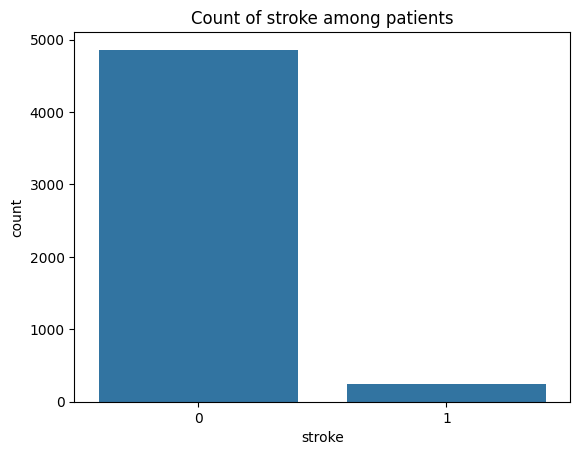

In [28]:
# Create the distribution plot
sns.countplot(x='stroke', data=stroke_df)
plt.title('Count of stroke among patients')
plt.show()

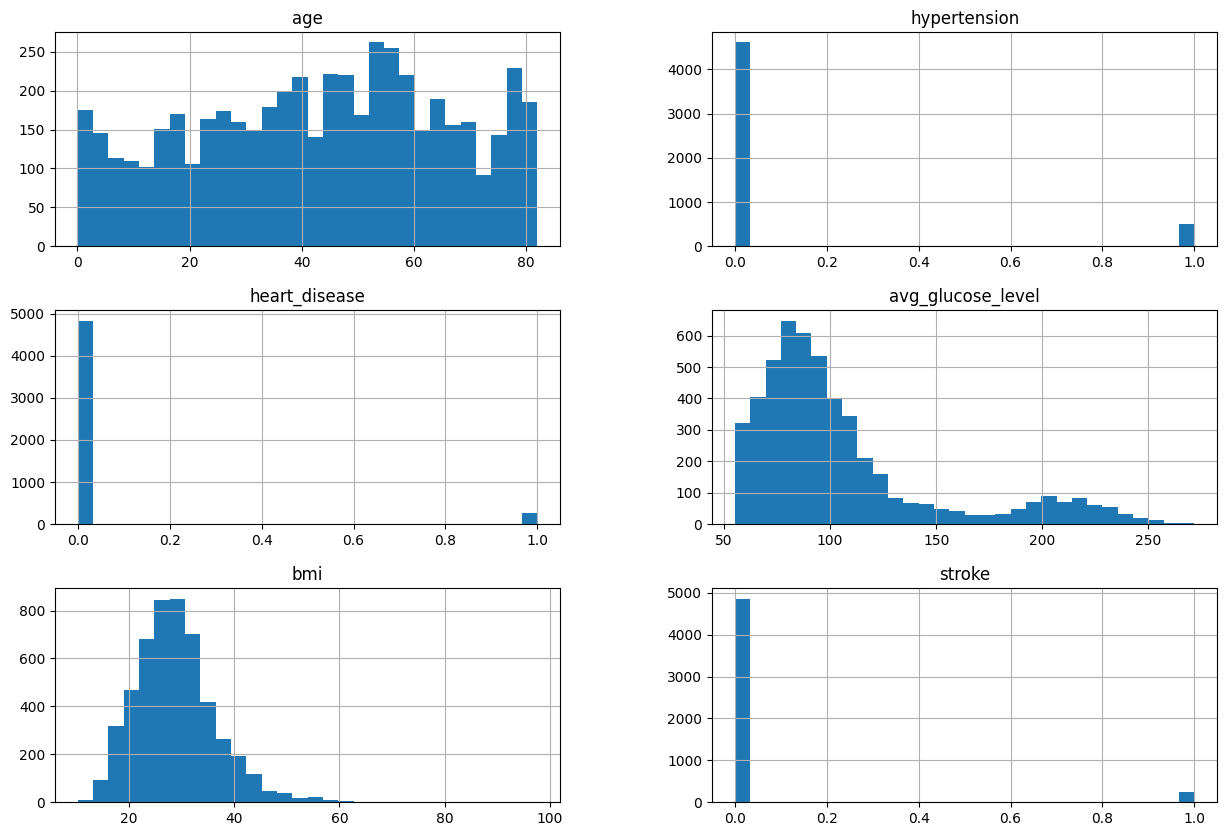

In [29]:
stroke_df.hist(bins=30, figsize=(15, 10))
plt.show()

The age has a normal distribution. We also have data from kids as well as from older people.
We have way more data points that don't have hypertension compared to people who have hypertention.
Same goes for heart_desease and stroke.
The average glucose level has more people with less higher glucose level than people with higher glucose level.
The bmi seems to have a distribution in the lower area.

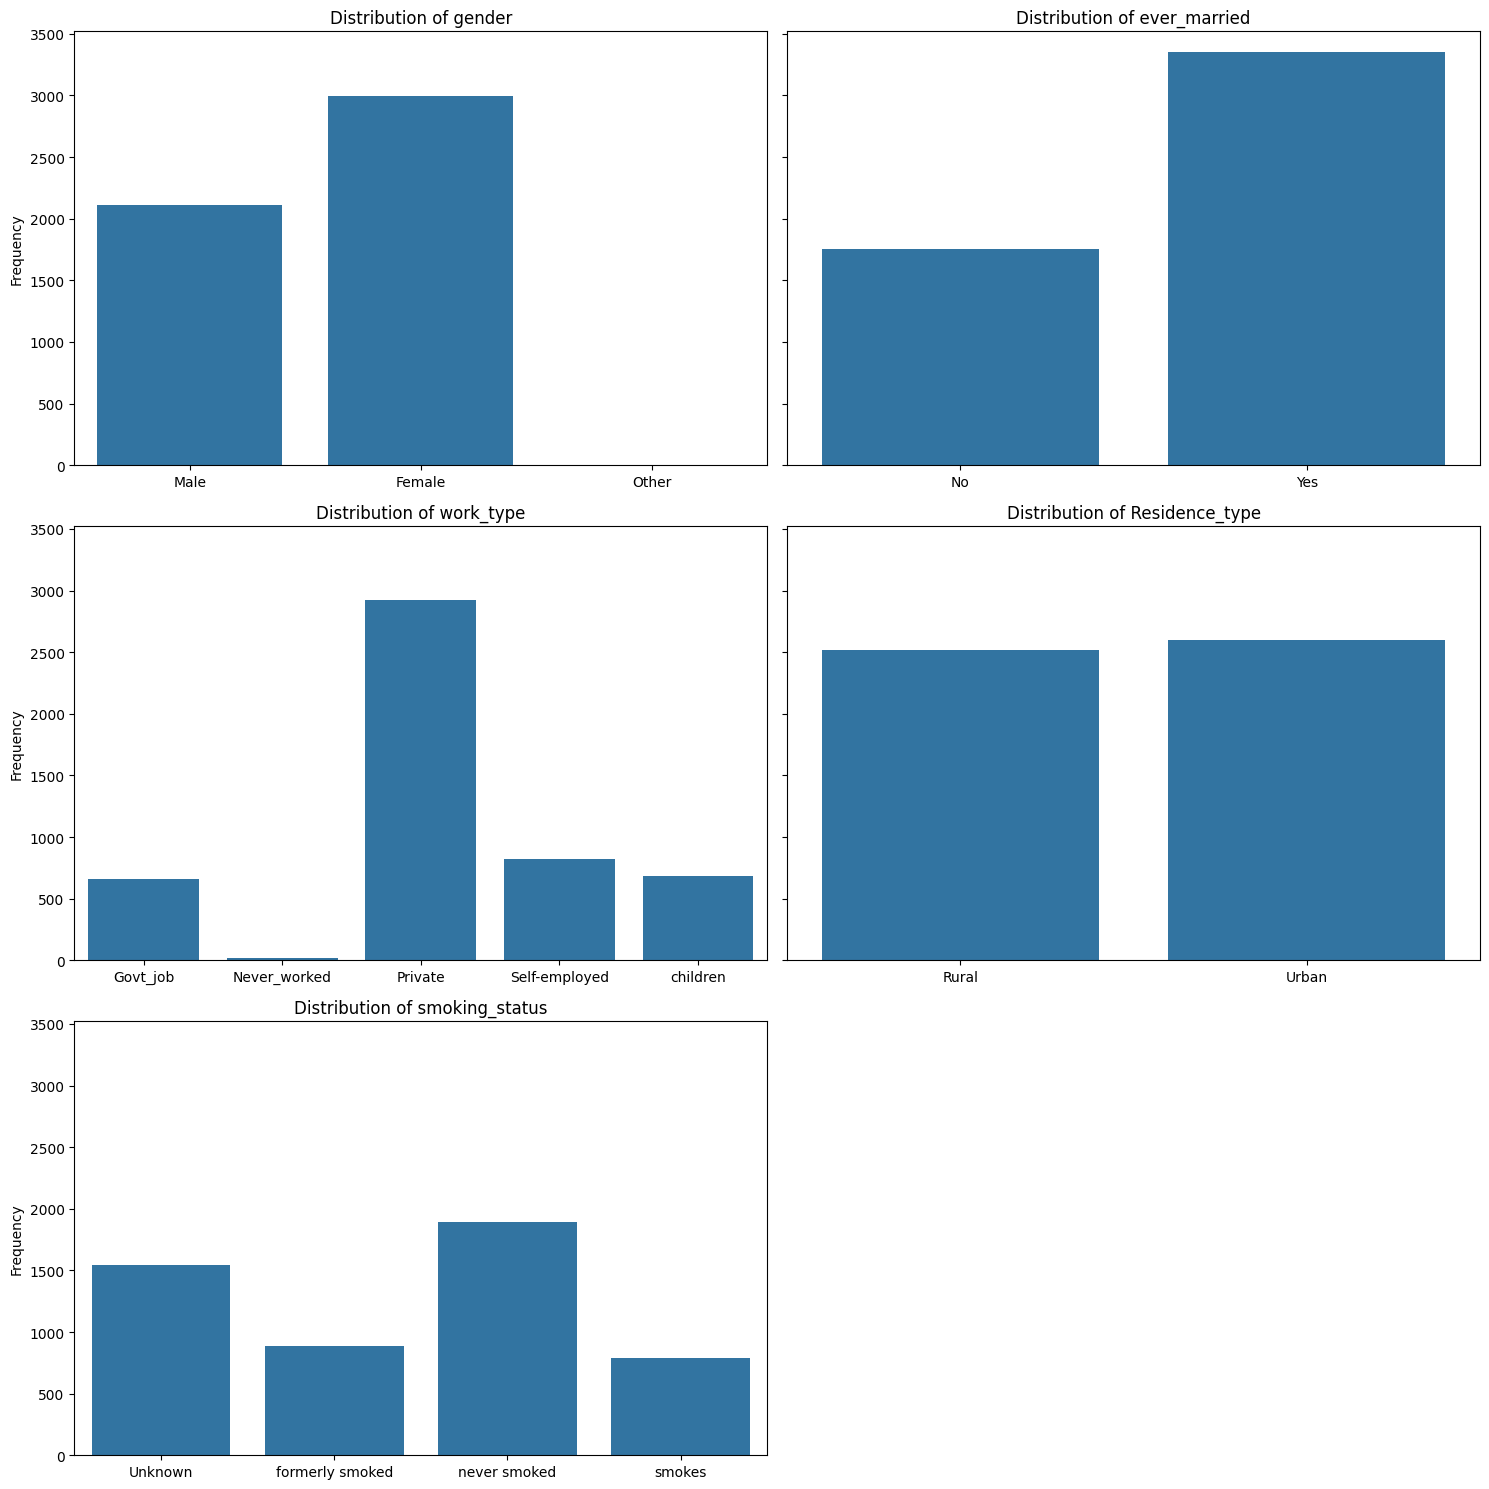

In [30]:
# List of categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Determine number of rows and columns
num_cols = 2  # Number of columns in each row
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=stroke_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('') 
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

We have an unequal distribution in the gender. Lets see if we need the other, we will look into that later.
More people are/were married then not.
There are more people who didnt tell the there work type compared to all the others conbined.
The Residence_type is almost equal.
Ruffly a third of the smoke status is uknknown.

### Data Cleaning

In [31]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [32]:
#lets focus on the gender first as we saw that there is an unknow gender
stroke_df.groupby("gender").gender.count()

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [33]:
#lets look onto it
stroke_df.loc[stroke_df.gender == "Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [34]:
# as there is only 1 row of that data we can drop it
stroke_df = stroke_df[stroke_df['gender'] != 'Other']

In [35]:
#lets now focus on work_type as this one has more than half of the data as private we can not use it otherwise it
#could have bad influence on our model
stroke_df.groupby("work_type").gender.count()

/var/folders/nc/ym8h4r491v53w5vndm8gcn9c0000gn/T/ipykernel_28357/109407189.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



work_type
Govt_job          657
Never_worked       22
Private          2924
Self-employed     819
children          687
Name: gender, dtype: int64

In [36]:
stroke_df = stroke_df.drop(['work_type'], axis=1)

In [37]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Urban,228.69,36.600000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Rural,202.21,29.879487,never smoked,1
31112,Male,80.0,0,1,Yes,Rural,105.92,32.500000,never smoked,1
60182,Female,49.0,0,0,Yes,Urban,171.23,34.400000,smokes,1
1665,Female,79.0,1,0,Yes,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Urban,83.75,28.476923,never smoked,0
44873,Female,81.0,0,0,Yes,Urban,125.20,40.000000,never smoked,0
19723,Female,35.0,0,0,Yes,Rural,82.99,30.600000,never smoked,0


In [38]:
# List of categorical columns to transform
categorical_columns = ['gender', 'ever_married', 'Residence_type']

# Create a copy of the original DataFrame
transformed_df = stroke_df.copy()

# Transform each categorical column to numerical codes, meaning that they will be changed to 0 and 1
for column in categorical_columns:
    transformed_df[column] = transformed_df[column].astype('category').cat.codes

In [39]:
transformed_df.rename(columns = {
    'gender': 'male',
    'Residence_type': 'urban_residence'
}, inplace = True)
transformed_df

,male,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,
9046,1,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1
51676,0,61.0,0,0,1,0,202.21,29.879487,never smoked,1
31112,1,80.0,0,1,1,0,105.92,32.500000,never smoked,1
60182,0,49.0,0,0,1,1,171.23,34.400000,smokes,1
1665,0,79.0,1,0,1,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
18234,0,80.0,1,0,1,1,83.75,28.476923,never smoked,0
44873,0,81.0,0,0,1,1,125.20,40.000000,never smoked,0
19723,0,35.0,0,0,1,0,82.99,30.600000,never smoked,0


In [40]:
#lets now tackle smoking_status
#we will set all people who smoked or smoke to 1, the other two statuses will stay 0
transformed_df['smoking_status'] = transformed_df['smoking_status'].map({'Unknown':0, 'never smoked':0, 'formerly smoked':1, 'smokes':1})


In [41]:
transformed_df['smoking_status'].value_counts()

smoking_status
0    3436
1    1673
Name: count, dtype: int64

In [42]:
d = dtale.show(transformed_df)
d.open_browser()  

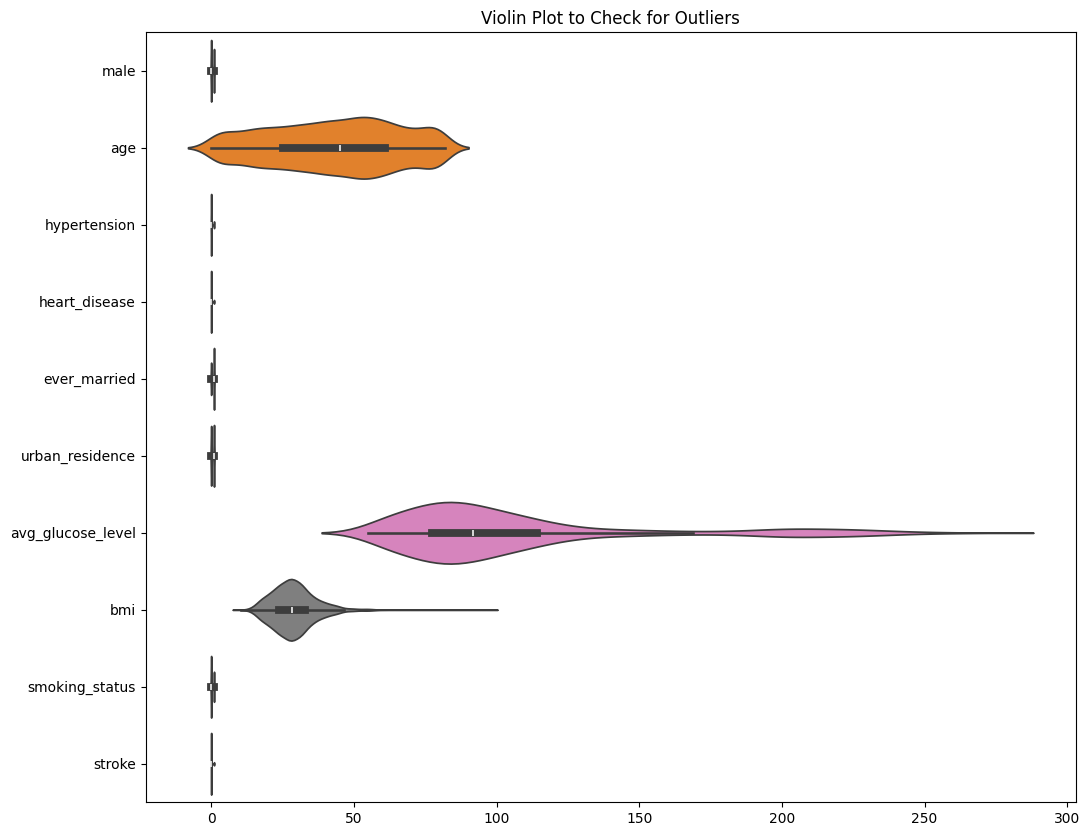

In [43]:
plt.figure(figsize=(12, 10))
violinplot = sns.violinplot(data=transformed_df, orient='h')
violinplot.set_title('Violin Plot to Check for Outliers')
plt.show()

Looks like the gluclose levels have quite a bir range. Bmi and age also have a bigger range compared to the others.

male                 0.009081
age                  0.245239
hypertension         0.127891
heart_disease        0.134905
ever_married         0.108299
urban_residence      0.015415
avg_glucose_level    0.131991
bmi                  0.041412
smoking_status       0.059007
stroke               1.000000
Name: stroke, dtype: float64


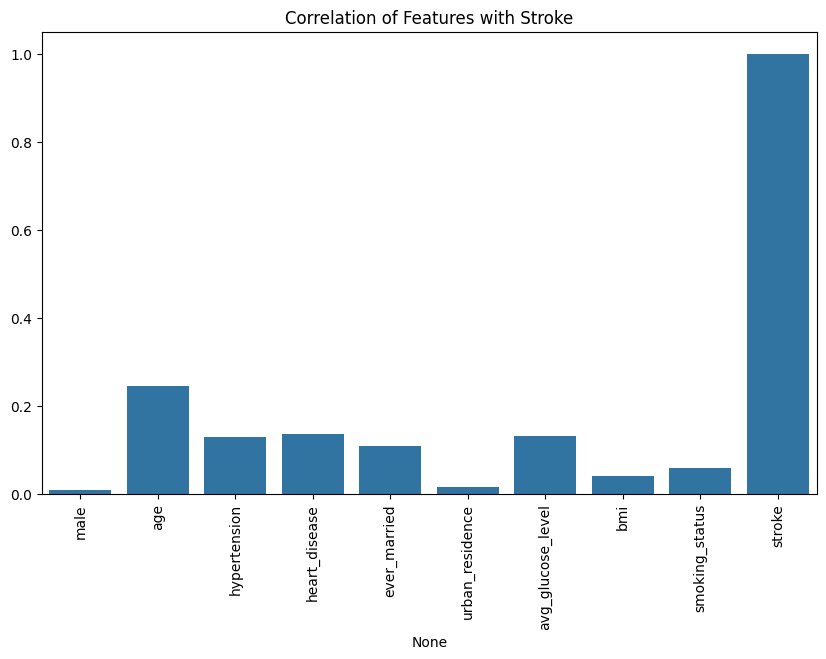

In [44]:
# Calculate the correlation matrix
corr_matrix = transformed_df.corr()

# Get the correlation of all features with the 'stroke' column
stroke_corr = corr_matrix['stroke']

# Optional: Filter to show only high correlations (e.g., absolute value > 0.5)
high_stroke_corr = stroke_corr[stroke_corr.abs() > 0.5]

# Display the correlations
print(stroke_corr)

# Plot the correlations with 'stroke' as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=stroke_corr.index, y=stroke_corr.values)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Stroke")
plt.show()

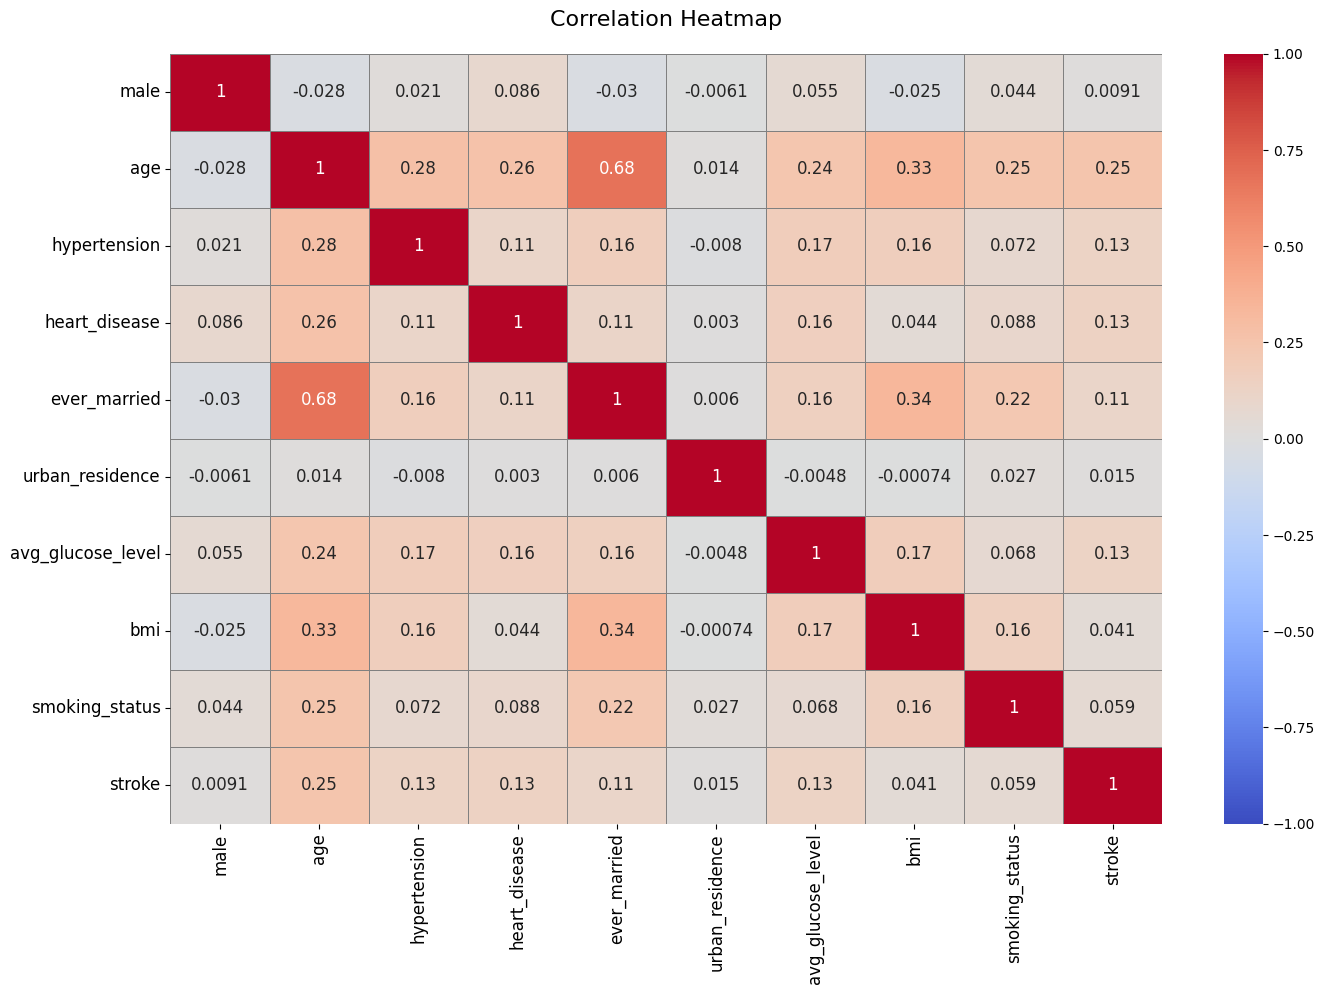

In [45]:
corr = transformed_df.corr()

plt.figure(figsize=(16, 10))

heatmap = sns.heatmap(
    corr,
    vmin=-1, vmax=1,
    annot=True,
    cmap='coolwarm',
    annot_kws={"size": 12},
    linewidths=0.5,
    linecolor='gray'
)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("beautiful-correlation-heatmap.png", bbox_inches='tight', dpi=300)
plt.show()

In [46]:
#transform all data types to numeric values
columns_to_convert = ['male', 'ever_married', 'urban_residence']
transformed_df[columns_to_convert] = transformed_df[columns_to_convert].astype('int64')
transformed_df.dtypes

male                   int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
urban_residence        int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [47]:
transformed_df.shape

(5109, 10)

In [48]:
transformed_df['stroke'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

stroke
0    95.13%
1     4.87%
Name: proportion, dtype: object

###### we see that 95% of the perople in the dataset did not have stroke
###### only 5 % of the people in the dataset had stroke
###### No proportinate distribution for each class is given. This means that is a chance of inbalance in the dataset



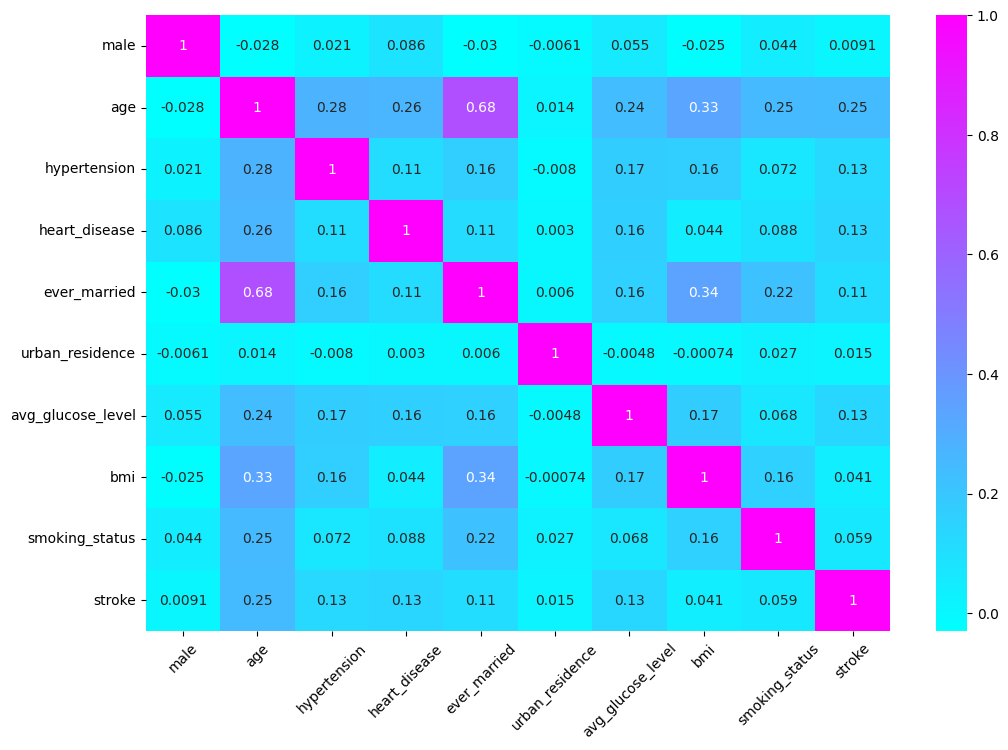

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(transformed_df.corr(), annot=True,cmap='cool')
plt.xticks(rotation=45);

# Modelling

In this Python Labs machine learning study, I will evaluate stroke risk using three different machine learning models: logistic regression, random forest, and support vector machine (SVM). I chose each model for its unique strengths and capabilities that provide a comprehensive approach to understanding the factors that contribute to fall risk.

Logistic regression was my first choice due to its simplicity and interpretability. As a widely used statistical framework for binary classification, it provides direct insight into how each factor influences the likelihood of stroke. This model is a necessary starting point and allows me to establish a baseline performance measure that I can compare to other, more complex models. The feasibility helps to assess a patient's risk and is therefore of great value in clinical practice.

Random Forest was chosen for its robustness and ability to handle the inherent complexity of clinical data. The combination of multiple decision trees reduces random overfitting of forests and increases prediction accuracy. In addition, it is particularly adept at dealing with imbalanced datasets, a common challenge in stroke prediction where positive cases are less common than negative ones The model's ability to score it is important in part because it allows me to identify important indicators of seizure risk, providing valuable insights for clinicians

The support vector machine (SVM) was included to leverage its effectiveness in high-dimensional environments and its ability to model nonlinear relationships between features The strength of the SVM is to discriminate between classes, which can improve generalization in complex datasets. Use of the kernel function.

The decision tree model was chosen as the fourth model in this study due to its interpretability and simplicity. It is similar to logistic regression, but has a distinct advantage in handling complex, non-linear relationships between features. Decision trees work by recursively splitting the data based on the most informative features, making them particularly useful when dealing with a mixture of categorical and continuous variables, which are common in clinical data.

## x, y split

Let us seperate the data into features and attributes.

In [50]:
X = transformed_df.drop('stroke', axis=1)
y = transformed_df[['stroke']]

In [51]:
y.value_counts() 
# we see that we have quiet a big inbalance between people that had stroke and people that don't

stroke
0         4860
1          249
Name: count, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Model 1: Logistic Regression

## Fit model

In [53]:
#Applying Standardization using StandardScaler() to our train dataset only to reduce the risk of data leakage.

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train_scaled.shape, X_test_scaled.shape 

((3576, 9), (1533, 9))

In [55]:
# lets try to use the Logistic Regression again, this time with a class_weight that is more balanced
lr_model_balanced = LogisticRegression(class_weight='balanced', random_state=2)
lr_model_balanced.fit(X_train_scaled, y_train.values.ravel())  # to remove 1d array error message

LogisticRegression(class_weight='balanced', random_state=2)

## Evaluate model

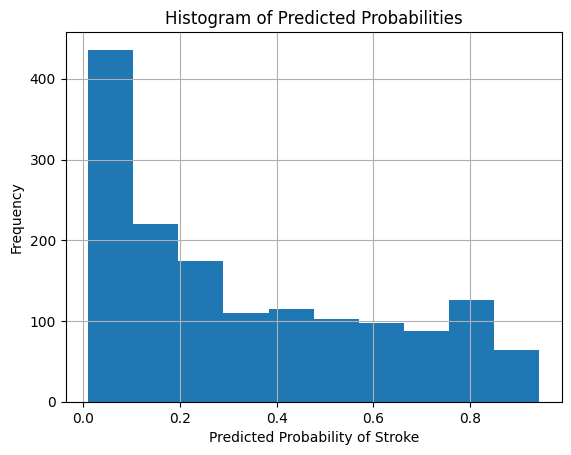

In [56]:
y_pred = lr_model_balanced.predict(X_test_scaled)
y_prob = lr_model_balanced.predict_proba(X_test_scaled)[::, 1]
# Convert the probabilities to a pandas Series
pd.Series(y_prob).hist(bins=10)

# Show the plot
plt.xlabel('Predicted Probability of Stroke')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

In [57]:
# Calculate accuracy
lr_acc_scored = accuracy_score(y_test, y_pred)
print(f'Accuracy: {lr_acc_scored:.2f}')

lr_f1_scored = f1_score(y_test, y_pred)
print(f'f1_score: {lr_f1_scored:.2f}')

lr_recall_scored = recall_score(y_test, y_pred)
print(f'recall_score: {lr_recall_scored:.2f}')

lr_auc_scored = roc_auc_score(y_test, y_pred)
print(f'roc_auc_score: {lr_auc_scored:.2f}')

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.74
f1_score: 0.23
recall_score: 0.81
roc_auc_score: 0.77
Confusion Matrix:
[[1071  387]
 [  14   61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1458
           1       0.14      0.81      0.23        75

    accuracy                           0.74      1533
   macro avg       0.56      0.77      0.54      1533
weighted avg       0.95      0.74      0.81      1533



The model achieves an accuracy of 73.8%, showing an improvement in detecting stroke cases compared to the previous result.
The confusion matrix indicates that while most "no stroke" cases are correctly classified, 387 are misclassified as "stroke."
Precision for class 1 (stroke) is still low at 0.14, but recall has significantly improved to 0.81, meaning the model identifies most stroke cases.
The model needs further tuning, as it misclassifies many non-stroke cases, leading to a trade-off between precision and recall.


In [58]:
lr_model_balanced = LogisticRegression(class_weight='balanced', random_state=2)
# Fit the model on the training data
lr_model_balanced.fit(X_train_scaled, y_train.values.ravel())  # to remove 1d array error message

# Perform cross-validation using ROC-AUC as the scoring metric
cv_scores_test = cross_val_score(lr_model_balanced, X_test_scaled, y_test.values.ravel(), cv=5, scoring='roc_auc')
cv_scores_train = cross_val_score(lr_model_balanced, X_train_scaled, y_train.values.ravel(), cv=5, scoring='roc_auc')

# Calculate mean and standard deviation for test and train cross-validation scores
cv_scores_lr_test = cv_scores_test.mean()
cv_scores_lr_train = cv_scores_train.mean()
cv_scores_std_test_lr = cv_scores_test.std()

# Print the cross-validation results
print('Test CV Scores:', cv_scores_test)
print('Mean cross validation test score:', cv_scores_lr_test)
print('Mean cross validation train score:', cv_scores_lr_train)
print('Standard deviation in CV test scores:', cv_scores_std_test_lr)


Test CV Scores: [0.77283105 0.8109589  0.89726027 0.83802978 0.86414662]
Mean cross validation test score: 0.8366453263035666
Mean cross validation train score: 0.8337022421303324
Standard deviation in CV test scores: 0.04281229710545346


Cross-Validation Results:
Test CV Scores: [0.7728, 0.8109, 0.8973, 0.8380, 0.8641].
The average test score is 0.8366, indicating good performance in distinguishing between classes.
The train score (0.8337) is close to the test score, showing that the model generalizes well.
A standard deviation of 0.0428 means the model's performance is fairly consistent across different test folds.


# Model 2: Random Forest

## Fit model

In [59]:
# Split the data into training and testing sets
# This time without scalling as random forest is tree based 
#  tree-based methods do not rely on the scale of the features to make a split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [60]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=24)

In [61]:
# Fit the model on the training data
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=24)

In [62]:
# Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[::, 1]

## Evaluate model

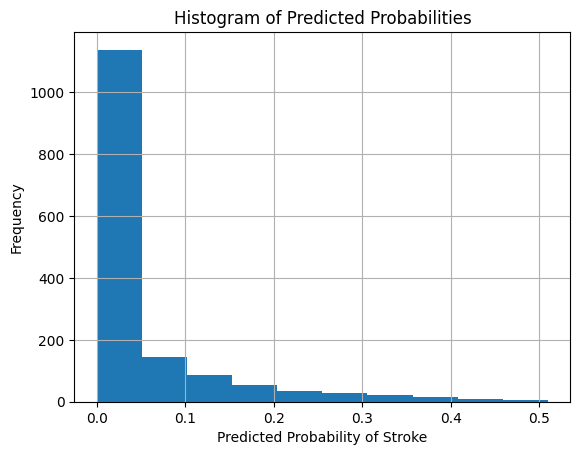

In [63]:
# Convert the probabilities to a pandas Series
pd.Series(y_prob).hist(bins=10)

# Show the plot
plt.xlabel('Predicted Probability of Stroke')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

In [64]:
# Calculate accuracy
rf_acc_scored = accuracy_score(y_test, y_pred)
print(f'Accuracy: {rf_acc_scored:.2f}')

rf_f1_scored = f1_score(y_test, y_pred)
print(f'f1_score: {rf_f1_scored:.2f}')

rf_recall_scored = recall_score(y_test, y_pred)
print(f'recall_score: {rf_recall_scored:.2f}')

rf_auc_scored = roc_auc_score(y_test, y_pred)
print(f'roc_auc_score: {rf_auc_scored:.2f}')

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Get feature importance
importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

Accuracy: 0.96
f1_score: 0.03
recall_score: 0.02
roc_auc_score: 0.51
Confusion Matrix:
[[1467    1]
 [  64    1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1468
           1       0.50      0.02      0.03        65

    accuracy                           0.96      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.94      0.96      0.94      1533

             Feature  Importance
6  avg_glucose_level    0.316891
7                bmi    0.273028
1                age    0.242999
5    urban_residence    0.034570
0               male    0.032169
8     smoking_status    0.029288
2       hypertension    0.027340
3      heart_disease    0.024656
4       ever_married    0.019058


The model achieved an accuracy of 96%, correctly predicting the majority class (no stroke) with high precision (0.96). 

However, the model struggles with the minority class (stroke), achieving only 50% precision and 2% recall, indicating a significant imbalance in class predictions.

The weighted average metrics reflect the model's strong performance on the majority class but poor performance on the minority class, lowering the macro average.

Feature importance shows that avg_glucose_level, bmi, and age are the top predictors, while other features like hypertension and smoking_status contribute less.


## Refit model - this time with Hyerparameters

In [65]:
# Initialize the Random Forest Classifier with class weights (optional)
rf_grid_model = RandomForestClassifier(n_estimators=100, random_state=24)

# Hyperparameter tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

In [66]:
grid_search = GridSearchCV(estimator=rf_grid_model, param_grid=param_grid,
                           scoring="recall", n_jobs=-1, verbose=2,cv=5)
grid_search.fit(X_train, y_train.values.ravel())

# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Fit the best model on the resampled training data
best_rf_model.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto

[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; tota

[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; t

[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200

[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s

[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s

[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.

[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; t

[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; to

[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0

[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; tot

[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s

[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0

[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END clas

[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=

[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END c

[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.

/Users/felixgroer/anaconda3/envs/bootcamp/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
597 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/felixgroer/anaconda3/envs/bootcamp/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/felixgroer/anaconda3/envs/bootcamp/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/felixgroer/anaconda3/envs/bootcamp/lib/python3.10/site-packages/sklearn/base.py",

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=24)

In [67]:
# Make predictions
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[::, 1]

## Evaluate model

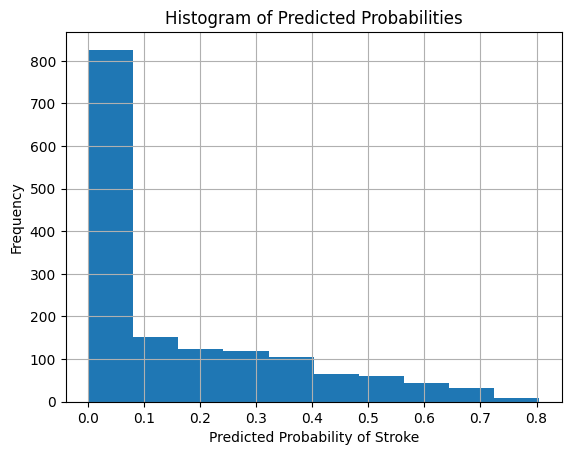

In [68]:
# Convert the probabilities to a pandas Series
pd.Series(y_prob).hist(bins=10)

# Show the plot
plt.xlabel('Predicted Probability of Stroke')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

In [69]:
# Calculate accuracy
rf_hyp_acc_scored = accuracy_score(y_test, y_pred)
print(f'Accuracy: {rf_hyp_acc_scored:.2f}')

rf_hyp_f1_scored = f1_score(y_test, y_pred)
print(f'f1_score: {rf_hyp_f1_scored:.2f}')

rf_hyp_recall_scored = recall_score(y_test, y_pred)
print(f'recall_score: {rf_hyp_recall_scored:.2f}')

rf_hyp_auc_scored = roc_auc_score(y_test, y_pred)
print(f'roc_auc_score: {rf_hyp_auc_scored:.2f}')

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Get feature importance
importance = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

Accuracy: 0.89
f1_score: 0.15
recall_score: 0.23
roc_auc_score: 0.57
Confusion Matrix:
[[1349  119]
 [  50   15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1468
           1       0.11      0.23      0.15        65

    accuracy                           0.89      1533
   macro avg       0.54      0.57      0.55      1533
weighted avg       0.93      0.89      0.91      1533

             Feature  Importance
1                age    0.514015
6  avg_glucose_level    0.180372
7                bmi    0.168037
4       ever_married    0.036347
2       hypertension    0.029672
3      heart_disease    0.020433
8     smoking_status    0.019439
0               male    0.015975
5    urban_residence    0.015710


The model achieved an accuracy of 89%, with strong performance on predicting the majority class (no stroke) at 96% precision and 92% recall.

However, it struggles with the minority class (stroke), showing only 11% precision and 23% recall, indicating that it underpredicts stroke cases.

The weighted average accuracy reflects good performance overall, but the macro average highlights poor results on the minority class.

Feature importance analysis shows that age, avg_glucose_level, and bmi are the top contributing features, while other factors like heart disease and smoking status have minimal impact.


# Model 3: Support vector machine (SVM)

## Fit model

In [70]:
svm_model_scaled = SVC(class_weight = "balanced")
svm_model_scaled.fit(X_train_scaled, y_train.values.ravel())
y_pred = svm_model_scaled.predict(X_test_scaled)

## Evaluate model

In [71]:
# Calculate accuracy
svm_acc_scored = accuracy_score(y_test, y_pred)
print(f'Accuracy: {svm_acc_scored:.2f}')

svm_f1_scored = f1_score(y_test, y_pred)
print(f'f1_score: {svm_f1_scored:.2f}')

svm_recall_scored = recall_score(y_test, y_pred)
print(f'recall_score: {svm_f1_scored:.2f}')

svm_auc_scored = roc_auc_score(y_test, y_pred)
print(f'roc_auc_score: {svm_auc_scored:.2f}')

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.49
f1_score: 0.08
recall_score: 0.08
roc_auc_score: 0.52
Confusion Matrix:
[[712 756]
 [ 29  36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.49      0.64      1468
           1       0.05      0.55      0.08        65

    accuracy                           0.49      1533
   macro avg       0.50      0.52      0.36      1533
weighted avg       0.92      0.49      0.62      1533



The model exhibits an accuracy of 49%, indicating poor overall performance in predicting stroke cases.

Precision for the majority class (no stroke) is high at 96%, but recall is low at 49%, showing it often misses stroke cases.

Conversely, the minority class (stroke) has a precision of only 5% and a recall of 55%, suggesting significant challenges in correctly identifying strokes.

The feature importance indicates that age, avg_glucose_level, and bmi are the most influential factors in predictions, while other features contribute less to the model's performance.


## Refit the model - with hyperparameters

In [72]:
# Create an SVM model
svm_model_grid = SVC(class_weight = "balanced")

param_grid = {
    'C': [10, 100, 1000],
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto', 1]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=svm_model_grid, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)

In [73]:
# Fit the model
grid_search.fit(X_train_scaled, y_train.values.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 'auto', 1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [74]:
# View the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
best_svm_model = grid_search.best_estimator_

Best Parameters: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8808715865140446


In [75]:
y_pred = best_svm_model.predict(X_test_scaled)

## Evaluate model

In [76]:
# Calculate accuracy
svm_hyp_acc_scored = accuracy_score(y_test, y_pred)
print(f'Accuracy: {svm_hyp_acc_scored:.2f}')

svm_hyp_f1_scored = f1_score(y_test, y_pred)
print(f'f1_score: {svm_hyp_f1_scored:.2f}')

svm_hyp_recall_scored = recall_score(y_test, y_pred)
print(f'recall_score: {svm_hyp_recall_scored:.2f}')

svm_hyp_auc_scored = roc_auc_score(y_test, y_pred)
print(f'roc_auc_score: {svm_hyp_auc_scored:.2f}')

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Get feature importance
importance = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

Accuracy: 0.89
f1_score: 0.09
recall_score: 0.14
roc_auc_score: 0.53
Confusion Matrix:
[[1351  117]
 [  56    9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1468
           1       0.07      0.14      0.09        65

    accuracy                           0.89      1533
   macro avg       0.52      0.53      0.52      1533
weighted avg       0.92      0.89      0.90      1533

             Feature  Importance
1                age    0.514015
6  avg_glucose_level    0.180372
7                bmi    0.168037
4       ever_married    0.036347
2       hypertension    0.029672
3      heart_disease    0.020433
8     smoking_status    0.019439
0               male    0.015975
5    urban_residence    0.015710


The model achieved an accuracy of 0.89, indicating that it correctly classified 89% of the instances in the test set. 
The confusion matrix reveals that while the model performed well in identifying the majority class (false cases), it struggled with the minority class (true cases), resulting in a low precision of 0.07 and a recall of 0.14 for that class.

Overall, the performance metrics suggest a strong ability to predict the majority class but significant challenges in accurately identifying the minority class, highlighting potential issues with class imbalance.

# Model 3: Decision Tree

## Fit model

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [78]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=24,class_weight = "balanced")
# Fit the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=24)

In [79]:
# Make predictions on the test data
y_pred = dt_model.predict(X_test)

## Evaluate model

In [80]:
# Calculate accuracy
dt_acc_scored = accuracy_score(y_test, y_pred)
print(f'Accuracy: {dt_acc_scored:.2f}')

dt_f1_scored = f1_score(y_test, y_pred)
print(f'f1_score: {dt_f1_scored:.2f}')

dt_recall_scored = recall_score(y_test, y_pred)
print(f'recall_score: {dt_recall_scored:.2f}')

dt_auc_scored = roc_auc_score(y_test, y_pred)
print(f'roc_auc_score: {dt_auc_scored:.2f}')

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Get feature importance
importance = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

Accuracy: 0.92
f1_score: 0.11
recall_score: 0.11
roc_auc_score: 0.53
Confusion Matrix:
[[1411   57]
 [  58    7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1468
           1       0.11      0.11      0.11        65

    accuracy                           0.92      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.92      0.92      0.92      1533

             Feature  Importance
1                age    0.499362
7                bmi    0.219767
6  avg_glucose_level    0.202671
5    urban_residence    0.025261
3      heart_disease    0.014629
8     smoking_status    0.014536
2       hypertension    0.010242
0               male    0.009215
4       ever_married    0.004318


This model achieved an overall accuracy of 0.92, meaning it correctly predicted stroke or no stroke for 92% of the samples. The confusion matrix shows that the model made 1,411 true negative predictions (no stroke correctly predicted) and 58 true positive predictions (stroke correctly predicted). However, for classifying stroke cases (class 1), the model's performance is poor, as indicated by the low precision (0.11), recall (0.11), and f1-score (0.11). This imbalance is due to the model's difficulty in correctly identifying the minority class (stroke cases).

The feature importance shows that age (0.514) is the most influential factor, followed by avg_glucose_level (0.180) and BMI (0.168), suggesting these are the key factors driving the model's predictions.

In [81]:
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Random Forest with Hyperparameters', 'SVM', 'SVM with Hyperparameters', 'Decision Tree'],
    'Accuracy': [lr_acc_scored, rf_acc_scored, rf_hyp_acc_scored, svm_acc_scored, svm_hyp_acc_scored, dt_acc_scored],
    'F1 Score': [lr_f1_scored, rf_f1_scored, rf_hyp_f1_scored, svm_f1_scored, svm_hyp_f1_scored, dt_f1_scored],
    'Recall': [lr_recall_scored, rf_recall_scored, rf_hyp_recall_scored, svm_recall_scored, svm_hyp_recall_scored, dt_recall_scored],
    'ROC AUC': [lr_auc_scored, rf_auc_scored, rf_hyp_auc_scored, svm_auc_scored, svm_hyp_auc_scored, dt_auc_scored]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                                Model  Accuracy  F1 Score    Recall   ROC AUC
0                 Logistic Regression  0.738421  0.233270  0.813333  0.773951
1                       Random Forest  0.957599  0.029851  0.015385  0.507352
2  Random Forest with Hyperparameters  0.889759  0.150754  0.230769  0.574853
3                                 SVM  0.487932  0.084014  0.553846  0.519430
4            SVM with Hyperparameters  0.887149  0.094241  0.138462  0.529381
5                       Decision Tree  0.924984  0.108527  0.107692  0.534432


/var/folders/nc/ym8h4r491v53w5vndm8gcn9c0000gn/T/ipykernel_28357/4221322982.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/nc/ym8h4r491v53w5vndm8gcn9c0000gn/T/ipykernel_28357/4221322982.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/nc/ym8h4r491v53w5vndm8gcn9c0000gn/T/ipykernel_28357/4221322982.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/nc/ym8h4r491v53w5vndm8gcn9c0000gn/T/ipykernel_28357/4221322982.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

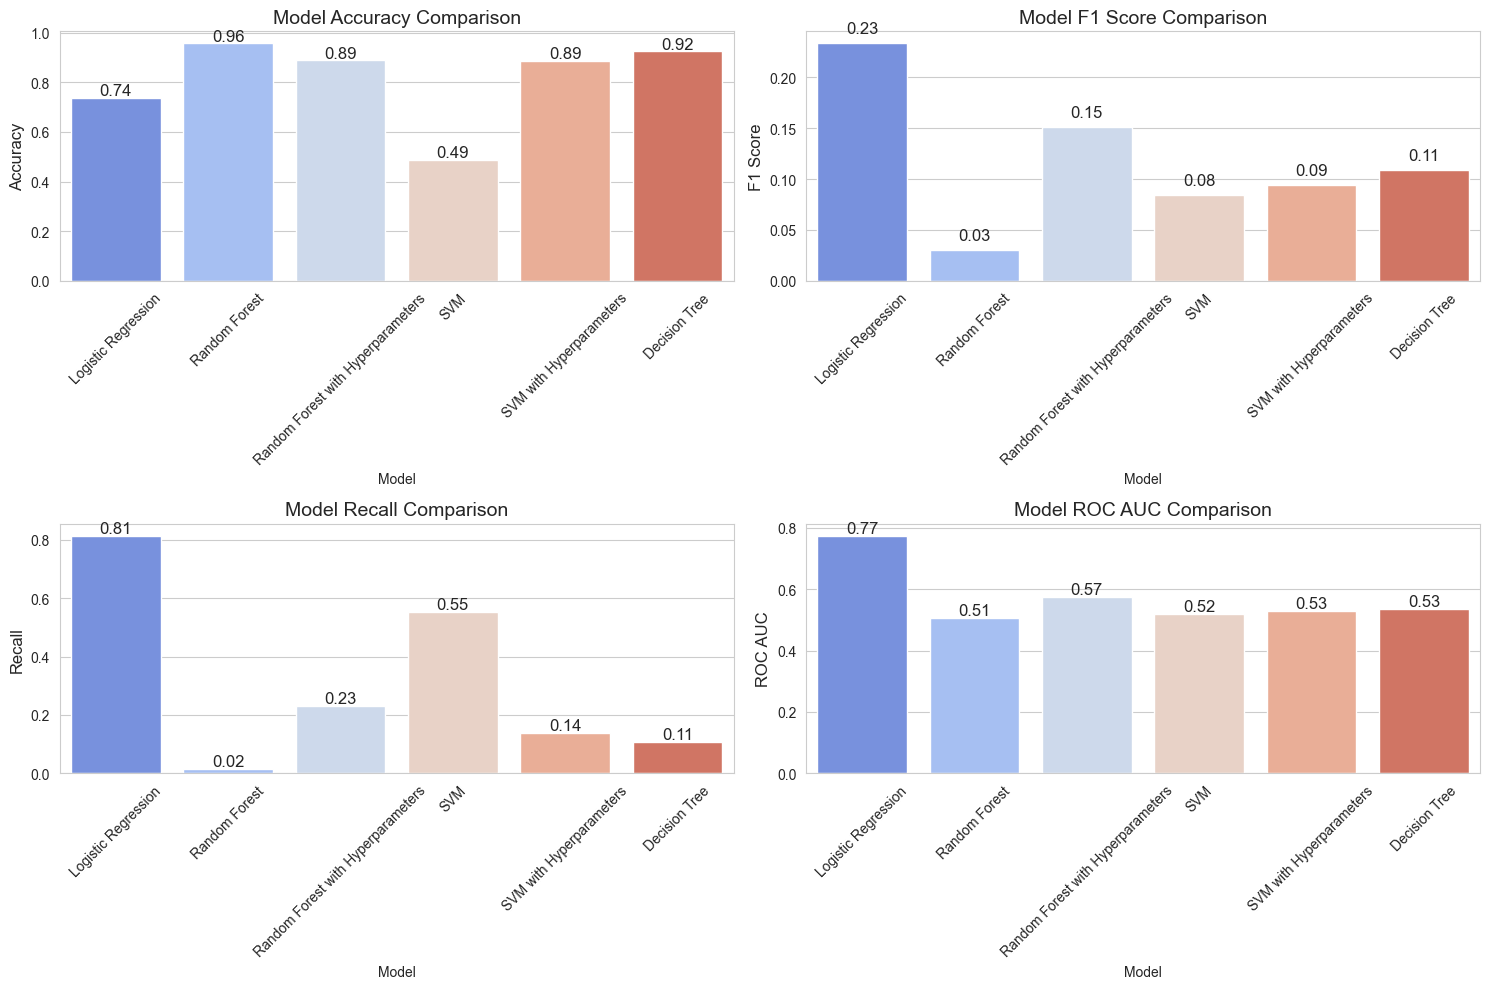

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
colors = sns.color_palette("coolwarm", 6)

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x=metrics_df['Model'], y=metrics_df['Accuracy'], palette=colors)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45)
for i in range(len(metrics_df['Accuracy'])):
    plt.text(i, metrics_df['Accuracy'][i] + 0.01, f'{metrics_df["Accuracy"][i]:.2f}', ha='center', fontsize=12)

# Plot F1 Score
plt.subplot(2, 2, 2)
sns.barplot(x=metrics_df['Model'], y=metrics_df['F1 Score'], palette=colors)
plt.title('Model F1 Score Comparison', fontsize=14)
plt.ylabel('F1 Score', fontsize=12)
plt.xticks(rotation=45)
for i in range(len(metrics_df['F1 Score'])):
    plt.text(i, metrics_df['F1 Score'][i] + 0.01, f'{metrics_df["F1 Score"][i]:.2f}', ha='center', fontsize=12)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x=metrics_df['Model'], y=metrics_df['Recall'], palette=colors)
plt.title('Model Recall Comparison', fontsize=14)
plt.ylabel('Recall', fontsize=12)
plt.xticks(rotation=45)
for i in range(len(metrics_df['Recall'])):
    plt.text(i, metrics_df['Recall'][i] + 0.01, f'{metrics_df["Recall"][i]:.2f}', ha='center', fontsize=12)

# Plot ROC AUC
plt.subplot(2, 2, 4)
sns.barplot(x=metrics_df['Model'], y=metrics_df['ROC AUC'], palette=colors)
plt.title('Model ROC AUC Comparison', fontsize=14)
plt.ylabel('ROC AUC', fontsize=12)
plt.xticks(rotation=45)
for i in range(len(metrics_df['ROC AUC'])):
    plt.text(i, metrics_df['ROC AUC'][i] + 0.01, f'{metrics_df["ROC AUC"][i]:.2f}', ha='center', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Summary

In this study, I applied six models in total of which 4 where different machine learning model types to predict stroke risk. I evaluated their performance using Accuracy, F1 Score, Recall, and ROC AUC to understand how well each model could classify stroke cases (positive class) versus non-stroke cases (negative class). The models I used were Logistic Regression, Random Forest (untuned and hyperparameter-tuned), Support Vector Machine (SVM) (untuned and hyperparameter-tuned), and Decision Tree. Here is a summary of the results and what I learned from the performance of each model:

In [83]:
print(metrics_df)

                                Model  Accuracy  F1 Score    Recall   ROC AUC
0                 Logistic Regression  0.738421  0.233270  0.813333  0.773951
1                       Random Forest  0.957599  0.029851  0.015385  0.507352
2  Random Forest with Hyperparameters  0.889759  0.150754  0.230769  0.574853
3                                 SVM  0.487932  0.084014  0.553846  0.519430
4            SVM with Hyperparameters  0.887149  0.094241  0.138462  0.529381
5                       Decision Tree  0.924984  0.108527  0.107692  0.534432
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END class_weight=

[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END class_weight=None,

[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0

[CV] END class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END class_weight=

[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=None

[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=None

## 1. Logistic Regression:
Why it worked: Logistic regression is simple. Its strength lies in its high recall (81%), meaning it identified a significant portion of stroke cases. Sadly it had lower precision and F1 score, meaning it misclassified non-stroke cases as strokes frequently.

What could be improved: By tuning the model more the f1 score could be imrpoved.

## 2. Random Forest:
Why it worked: Random Forest is a powerful ensemble model, and its high accuracy of 96% shows it made many correct predictions overall. However, the F1 score and recall were extremely low for the minority class (stroke), meaning it struggled to predict stroke cases.

What could be improved: This is an example of class imbalance affecting performance. Next time I could focus more on making the imbalance less visible in the model.

## 3. Random Forest (with Hyperparameter Tuning):
Why it worked: After tuning hyperparameters, the model improved in predicting stroke cases (shown by increased F1 score and recall). However, these metrics were still relatively low, which indicates room for further improvement.

What could be improved: More detailed tuning of parameters like max_depth, min_samples_split, and n_estimators could enhance this model’s performance.

## 4. Support Vector Machine (SVM):
Why it worked: SVM showed the potential for high recall (55%), meaning it captured many stroke cases. However, it performed poorly in other metrics, like accuracy (49%) and F1 score (0.08).

What could be improved: Tuning hyperparameters or using kernel methods like rbf or polynomial kernels may help. Thats why I tried it in the next step

## 5. SVM (with Hyperparameter Tuning):
Why it worked: After tuning, accuracy and recall improved slightly, but the model still struggled to handle the imbalanced dataset. The low F1 score and recall suggest that it continued to misclassify stroke cases.

What could be improved: Tuning with a focus on class weights. 

## 6. Decision Tree:
Why it worked: The Decision Tree model achieved a high accuracy of 92%. However, like the Random Forest, it struggled with recall and F1 score, indicating that it was good at classifying the majority class but had trouble identifying the minority class.

What could be improved: Pruning the tree, adjusting max depth.

## Conclusion
In my study Logistic Regression overall matched as the best model for stroke prediction due to its balanced performance with an accuracy of 0.74 and a recall of 0.81, which is crucial for identifying potential stroke cases in imbalanced data. Overall, Logistic Regression strikes the best balance for identifying high-risk patients.

While I obtained high accuracy in models like Random Forest and Decision Tree, the challenge of predicting stroke cases (the minority class) remains. Future improvements should focus on handling class imbalance, further hyperparameter tuning and maybe also trying more advanced models that fit the issue more. Also looking on to other data science models could help me understand how other people solve this or similiar issues. This project has given me insights into both the challenges and opportunities in  data modeling, providing a strong foundation for future work.